<a href="https://colab.research.google.com/github/katrienvanmeulder/STEM6/blob/master/20210204_linear_programming_oplossing_opdracht1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###################################################
## Opdracht 1 : probleem ivm middelen
###################################################


- We adviseren een fabrikant die luxe auto's produceert.

- Ze draaien op cycli van één maand (30 dagen), we hebben één cyclus de tijd om te laten zien dat we meerwaarde kunnen bieden.

- Er zijn één robot, 2 ingenieurs en één afwerker in de fabriek. De afwerker heeft wat vakantie, en is dus maar 21 dagen beschikbaar.

- De 2 verschillende auto modellen (A en B) hebben een andere tijd nodig wat middelen (robot, ingenieur en afwerker) betreft:

- Robottijd: 

  - auto A - 3 dagen; 
  - Auto B - 4 dagen.

- Ingenieur tijd: 
  - auto A - 5 dagen; 
  - Auto B - 6 dagen.

- Afwerker tijd: 
  - auto A - 1,5 dagen; 
  - Auto B - 3 dagen.

- Auto A levert € 30.000 winst op, terwijl auto B € 45.000 winst biedt.

- Op dit ogenblik produceren ze 4 auto's van elk model per maand, goed voor een winst van € 300.000. Niet slecht maar we denken dat we beter kunnen. Toon dit aan!


################################################### 

###################################################




-    ### Schrijf hieronder de te maximaliseren functie op</font>

  - X = aantal geproduceerde auto's van model A
  - Y = aantal geproduceerde auto's van model B
  - $$ 30.000 X + 45.000 Y$$

-   ### Noteer hieronder met welke constraints (beperkingen) er rekening gehouden dient te worden:

$$
\begin{matrix}
3X  + 4Y \leq 30 \\
5X + 6Y \leq 60 \\
1.5 X + 3Y \leq 21 \\
X &\geq 0 \\
Y &\geq 0  
\end{matrix}
$$



###################################################
###################################################



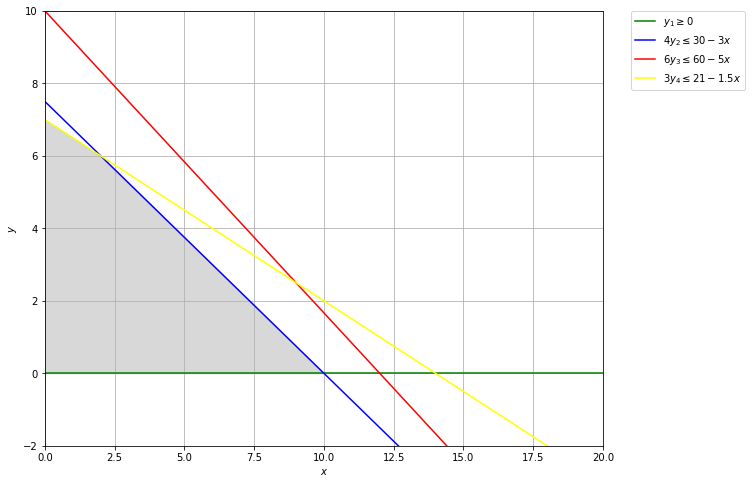

In [ ]:
###############################################################################
# pas onderstaande code aan om de constraints (beperkingen) te visualiseren
###############################################################################

import matplotlib.pyplot as plt
import numpy as np

# Construct lines
# x >= 0
x = np.linspace(0, 20, 200)
# y >= 0
y1 = 0*x + 0
# 4y <= (30 - 3x)
y2 = (30 - 3*x)/4.0
# 6y <= 60 - 5x
y3 = (60 - 5*x)/6.0
# 3y <= 21 - 1.5*x
y4 = (21 - 1.5*x)/3.0

fig, ax = plt.subplots(figsize=(10,8))
# Make plot
plt.plot(x, y1, color = 'green' , label=r'$y_1\geq0$')
plt.plot(x, y2, color= 'blue', label=r'$4y_2\leq 30 - 3x$')
plt.plot(x, y3, color = 'red', label=r'$6y_3\leq 60 - 5x$')
plt.plot(x, y4, color = 'yellow',label=r'$3y_4\leq 21 - 1.5x$')

plt.xlim((0, 20))
plt.ylim((-2, 10))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

ax.grid(True)

# Fill feasible region
y5 = np.minimum(np.minimum(y4, y2), y3)
#y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y1, where=y5>y1, color='grey', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
!pip install pulp


     |████████████████████████████████| 40.6MB 105kB/s 


In [ ]:
###############################################################################
# pas onderstaande code aan om de oplossing te berekenen
###############################################################################

import pulp

my_lp_problem = pulp.LpProblem("My LP Problem", pulp.LpMaximize)

x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=0, cat='Continuous')

# Objective function
my_lp_problem +=  30000*x + 45000*y, "Z"

# Constraints
my_lp_problem += 4*y <= 30 - 3*x
my_lp_problem += 6 * y <= 60 - 5*x
my_lp_problem += 3 * y <= 21 - 1.5*x


/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
my_lp_problem

My_LP_Problem:
MAXIMIZE
30000*x + 45000*y + 0
SUBJECT TO
_C1: 3 x + 4 y <= 30

_C2: 5 x + 6 y <= 60

_C3: 1.5 x + 3 y <= 21

VARIABLES
x Continuous
y Continuous

In [ ]:
my_lp_problem.solve()
for variable in my_lp_problem.variables():
    print(variable.name, variable.varValue)

x 2.0
y 6.0



---
---
## Opdracht 2: 





- Stel dat een boer een stuk landbouwgrond heeft, zeg 100 $km^2$, om te beplanten met tarwe of gerst of een combinatie van beide.
- De boer heeft een beperkte hoeveelheid kunstmest en pesticide, respectievelijk 600 en 500 kilogram.
- Voor elke vierkante kilometer tarwe is 8 kilo kunstmest en 5 kilo pesticide nodig, terwijl voor elke vierkante kilometer gerst 3 kilo kunstmest en 6 kilo pesticide nodig is.
- Stel dat 100 Euro de verkoopprijs van tarwe per vierkante kilometer is en 80 Euro de verkoopprijs van gerst.
- Als we het met tarwe en gerst beplante oppervlak met respectievelijk $x$ en $y$ aangeven, kan de winst worden gemaximaliseerd door optimale waarden voor $x$ en $y$ te kiezen.

- Zelfde opdrachten als bij oefening 1

  - Schrijf de te maximaliseren functie neer, alsook de beperkingen waar rekening mee gehouden dient te worden
  - Maak een schets van de constraints (beperkingen)
  - Ga op zoek naar de optimale oplossing

